In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
pd.options.display.max_columns = None

# **1. Display Top 5 Rows of The Dataset**

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **2. Check Last 5 Rows of The Dataset**

In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# **3. Find Shape of Our Dataset (Number of Rows And Number of Columns)**

In [7]:
data.shape

(284807, 31)

In [8]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


# **4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# **5. Check Null Values In The Dataset**

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# **Feature Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
data = data.drop(['Time'],axis=1)

In [15]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [16]:
data.shape


(284807, 30)

**CHECK FOR DUPLICATED VALUES****

In [17]:
data.duplicated().any()

True

# **Let's Remove Duplicated Values**

In [18]:
data = data.drop_duplicates()

In [19]:
data.shape

(275663, 30)

In [20]:
284807- 275663

9144

# **6. Not Handling Imbalanced

In [21]:
data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [22]:
import seaborn as sns

<Axes: ylabel='count'>

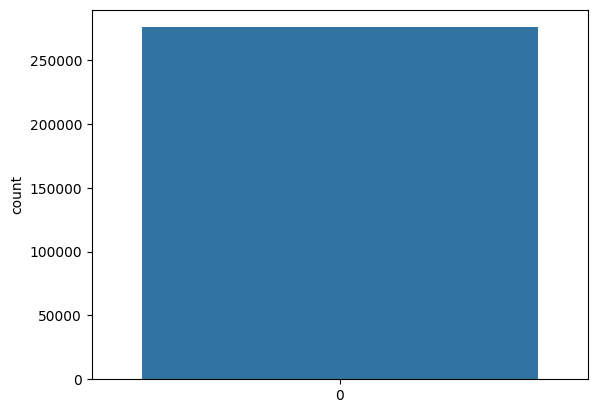

In [23]:
sns.countplot(data['Class'])

# **7. Store Feature Matrix In X And Response (Target) In Vector y**

In [24]:
X = data.drop('Class',axis=1)
y = data['Class']

# **8. Splitting The Dataset Into The Training Set And Test Set**

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# **9. Handling Imbalanced Dataset
# # Undersampling**

In [26]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [27]:
normal.shape

(275190, 30)

In [28]:
fraud.shape

(473, 30)

In [29]:
normal_sample=normal.sample(n=473)

In [30]:
normal_sample.shape

(473, 30)

In [31]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [32]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [33]:
new_data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.189416,0.807677,0.351504,2.604758,0.000184,-1.129293,0.621200,-0.351583,-1.184555,0.717551,0.047510,0.381052,0.483738,0.429624,0.100346,0.145445,-0.318674,-0.749646,-1.092005,-0.140380,0.027834,0.083971,-0.047035,0.946244,0.679386,0.032977,-0.035356,0.017136,-0.334838,0
1,-0.273272,2.489572,0.220664,4.724569,1.327840,-0.129698,1.071475,-0.138216,-2.359051,0.538836,-0.068329,-0.536148,1.237826,-2.730216,0.542799,0.473376,2.315011,0.742515,1.011719,0.449625,-0.363316,-0.827102,-0.080943,-0.274140,-0.443783,0.104157,0.317075,0.294905,-0.342355,0
2,0.042475,0.907929,0.274871,-0.616372,0.525175,-0.978508,1.051495,-0.217403,-0.146759,-0.441265,-0.821219,0.501466,0.710406,-0.024026,-0.426783,-0.163333,-0.417559,-0.898900,-0.134289,0.003031,-0.251012,-0.503819,0.061400,-0.071891,-0.471217,0.145424,0.254521,0.097614,-0.335358,0
3,1.972922,-0.030510,-1.390799,1.163933,0.591657,0.193021,0.096471,-0.054136,0.313371,0.315930,0.197150,1.324161,0.642113,0.132011,-1.465704,-0.272567,-0.653289,0.288758,0.240535,-0.155725,0.205035,0.848180,-0.104858,0.330955,0.511335,-0.403998,0.008226,-0.057818,-0.269270,0
4,1.897656,-0.324234,-0.325715,1.619204,-0.601475,-0.332475,-0.358980,0.094419,1.466536,0.032786,-1.583768,-0.267910,-2.134901,0.123975,-0.956979,-0.393586,0.118821,-0.735708,0.148508,-0.396661,-0.532423,-1.349143,0.456208,-0.149976,-0.404075,-1.097130,0.042833,-0.032494,-0.268350,0


In [34]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# **10. Logistic Regression**

In [36]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred1 = log.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred1)

0.9421052631578948

In [40]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [41]:
precision_score(y_test,y_pred1)

0.9690721649484536

In [42]:
recall_score(y_test,y_pred1)

0.9215686274509803

In [43]:
f1_score(y_test,y_pred1)

0.9447236180904522

# **11. Decision Tree Classifier**

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred2 = dt.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred2)

0.9210526315789473

In [47]:
precision_score(y_test,y_pred2)

0.9065420560747663

In [48]:
recall_score(y_test,y_pred2)

0.9509803921568627

In [49]:
f1_score(y_test,y_pred2)

0.9282296650717703

# **12. Random Forest Classifier**

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred3 = rf.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred3)

0.9263157894736842

In [53]:
precision_score(y_test,y_pred3)

0.9489795918367347

In [54]:
recall_score(y_test,y_pred3)

0.9117647058823529

In [55]:
f1_score(y_test,y_pred3)

0.9300000000000002

# **COMPARING THE ACCURACIES OF DIFFERENT MODELS**

In [56]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [57]:
final_data

,Models,ACC
0,LR,94.210526
1,DT,92.105263
2,RF,92.631579


<Axes: xlabel='Models', ylabel='ACC'>

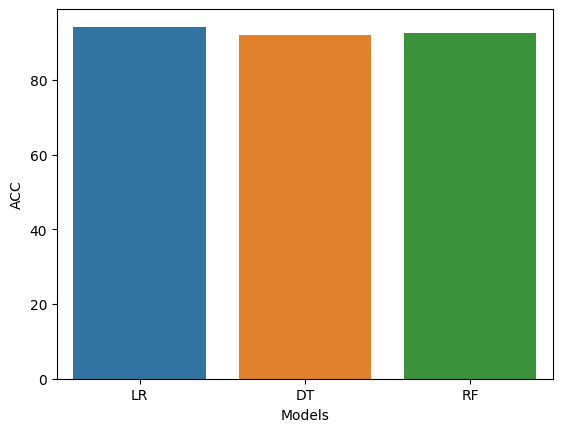

In [58]:
import seaborn as sns

# Assuming 'final_data' is your DataFrame with 'Models' and 'ACC' columns
sns.barplot(x='Models', y='ACC', data=final_data)


In [59]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [60]:
abc=AdaBoostClassifier(n_estimators=100,learning_rate=0.1)
xgbc=XGBClassifier(max_depth=1,n_estimators=30)

In [61]:
models=[log,
        rf,
        dt,
        abc,
        xgbc]

In [62]:
from sklearn.metrics import accuracy_score

for m in models:
    m.fit(X_train, y_train)
    
    test_pred = m.predict(X_test)
    accuracy = accuracy_score(y_test, test_pred)
    print('Accuracy: {:.4f}'.format(accuracy))

    

Accuracy: 0.9421
Accuracy: 0.9368
Accuracy: 0.9053
Accuracy: 0.9316
Accuracy: 0.9368


In [63]:
import pandas as pd

# Sample data: List of model names and their corresponding accuracy scores
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
accuracies = [0.9474, 0.9421, 0.9211, 0.9421, 0.9316]

# Create a DataFrame
accuracy_df = pd.DataFrame({'Model Name': model_names, 'Accuracy': accuracies})

# Print the table
print(accuracy_df)


  Model Name  Accuracy
0    Model 1    0.9474
1    Model 2    0.9421
2    Model 3    0.9211
3    Model 4    0.9421
4    Model 5    0.9316


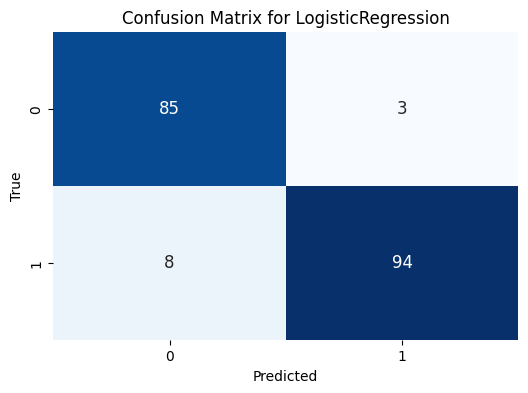

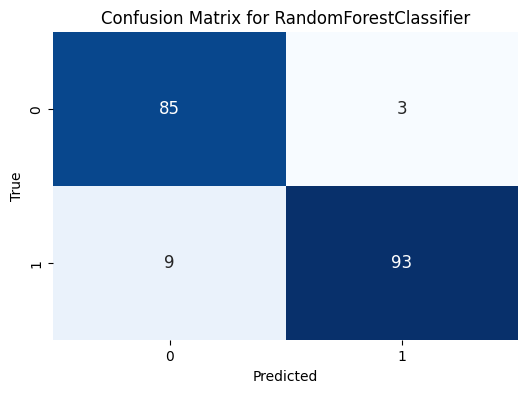

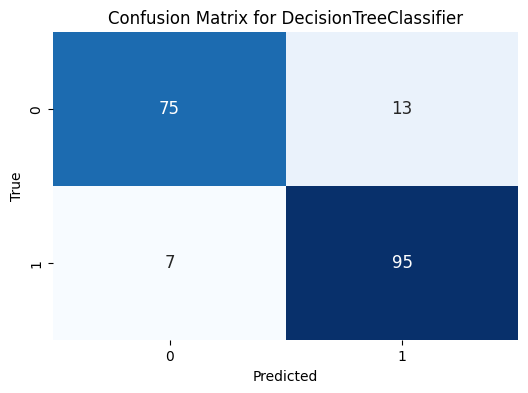

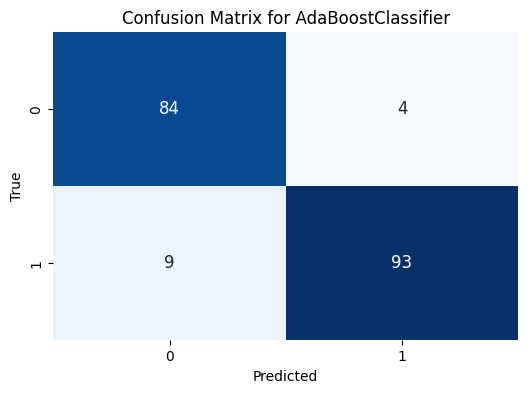

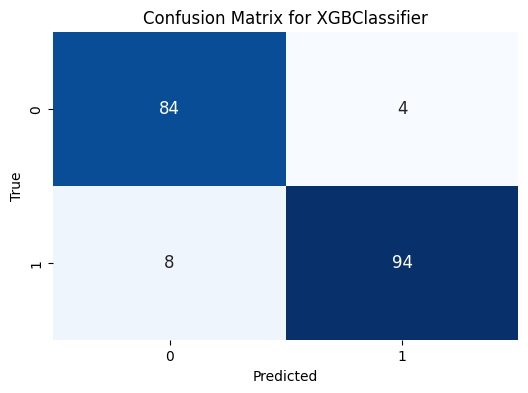

In [64]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'models' is a list of trained models

for model in models:
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, train_pred)  # Swap true and predicted labels
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 12}, cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.show()



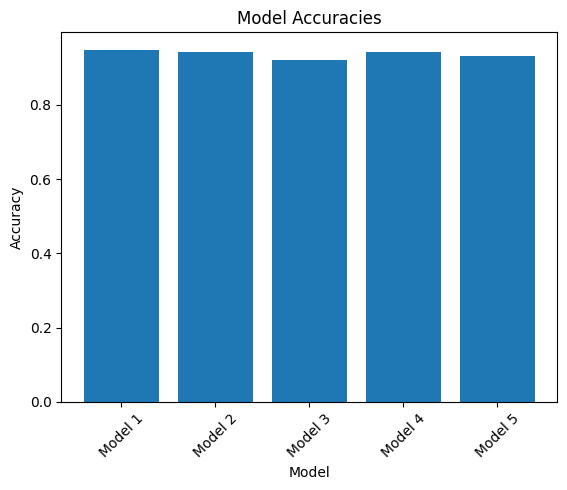

In [65]:
import matplotlib.pyplot as plt

# Sample data: List of model names and their corresponding accuracy scores
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
accuracies = [0.9474, 0.9421, 0.9211, 0.9421, 0.9316]

# Create a bar graph
plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')

# Customize the plot (optional)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the graph
plt.show()


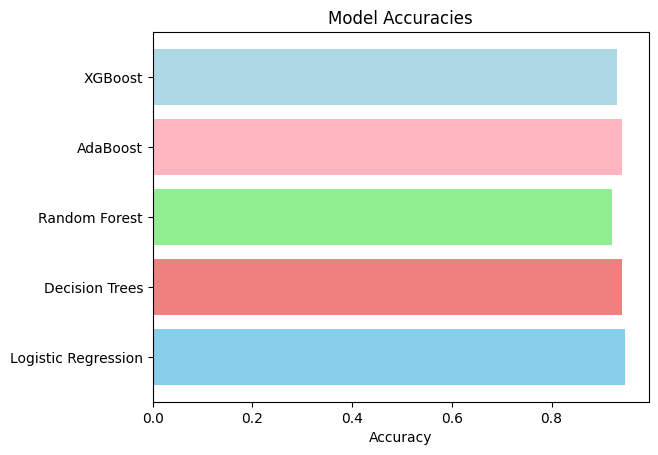

In [66]:
import matplotlib.pyplot as plt

# Sample data: List of model names and their corresponding accuracy scores
model_names = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'AdaBoost', 'XGBoost']
accuracies = [0.9474, 0.9421, 0.9211, 0.9421, 0.9316]

# Create a horizontal bar graph
plt.barh(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightblue'])
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Show the graph
plt.show()



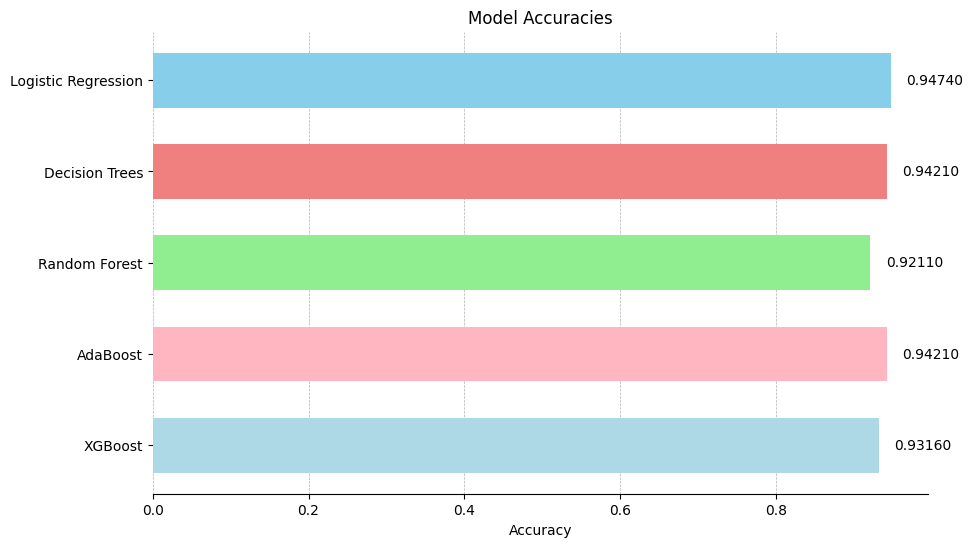

In [67]:
import matplotlib.pyplot as plt

# Actual model names and their corresponding accuracy scores
model_names = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'AdaBoost', 'XGBoost']
accuracies = [0.9474, 0.9421, 0.9211, 0.9421, 0.9316]

# Create a horizontal bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Customize the colors and aesthetics
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightblue']
bar_width = 0.6
bar_positions = range(len(model_names))

ax.barh(bar_positions, accuracies, height=bar_width, color=colors)
ax.set_yticks(bar_positions)
ax.set_yticklabels(model_names)
ax.invert_yaxis()  # Reverse the order of model names for better readability

# Label each bar with its accuracy score
for i, acc in enumerate(accuracies):
    ax.text(acc + 0.02, i, f'{acc:.5f}', va='center')

# Add labels and a title
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Customize the grid and remove the frame
ax.xaxis.grid(linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the graph
plt.show()


**WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables.

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92% 

10.Evaluation Step 

11Prediction**

In [68]:
import pandas as pd
import numpy as np
import keras

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [69]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')


In [70]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [71]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [72]:
data = df.iloc[:, :-1]
targets = df.iloc[:,-1]

In [73]:
print(data.shape)
print(targets.shape)

(284807, 30)
(284807,)


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=.3)

In [76]:
train_data, validation_data, train_targets, validation_targets = train_test_split(train_data, train_targets, test_size=.2)

In [77]:
mean = np.mean(train_data)
std = np.std(train_data)


train_data -= mean
train_data /= std

validation_data -= mean
validation_data /= std

test_data -= mean
test_data /= std

In [78]:
from keras import models, layers

In [79]:
model = models.Sequential()

model.add(layers.Dense(10, input_shape=(train_data.shape[1],), activation='relu'))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [80]:
from sklearn.metrics import classification_report

model.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [81]:
history = model.fit(train_data, train_targets, epochs=100, batch_size=64)

Epoch 1/100
2493/2493 [==============================] - 5s 2ms/step - loss: 2.4909
Epoch 2/100
2493/2493 [==============================] - 4s 2ms/step - loss: 1.5593
Epoch 3/100
2493/2493 [==============================] - 5s 2ms/step - loss: 0.7851
Epoch 4/100
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0937
Epoch 5/100
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0158
Epoch 6/100
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0155
Epoch 7/100
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0155
Epoch 8/100
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0153
Epoch 9/100
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0151
Epoch 10/100
2493/2493 [==============================] - 5s 2ms/step - loss: 0.0151
Epoch 11/100
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0343
Epoch 12/100
2493/2493 [==============================] - 5s 2ms/step - lo

In [82]:
val_predictions = model.predict(validation_data)

1247/1247 [==============================] - 2s 1ms/step


In [83]:
val_predictions

array([[0.00058779],
       [0.00058785],
       [0.00058776],
       ...,
       [0.00058709],
       [0.00058697],
       [0.00058742]], dtype=float32)

In [84]:
# Convert val_predictions to binary predictions based on the threshold
# Define the threshold value
threshold = 0.5  # You can adjust this threshold value according to your needs

binary_val_predictions = (val_predictions > threshold).astype(int)

# Assuming validation_targets is a pandas Series, extract the values to make it 1-dimensional
validation_targets_array = validation_targets.values

# Calculate accuracy
accuracy = np.mean(binary_val_predictions.flatten() == validation_targets_array)
print("Validation Accuracy:", accuracy)



Validation Accuracy: 0.9982444260527173


In [85]:
# Assuming you have test data (test_data) and test targets (test_targets)
# Convert test data to binary predictions
test_predictions = model.predict(test_data)
binary_test_predictions = (test_predictions > threshold).astype(int)

# Assuming test_targets is a pandas Series, extract the values to make it 1-dimensional
test_targets_array = test_targets.values

# Calculate accuracy on test data
test_accuracy = np.mean(binary_test_predictions.flatten() == test_targets_array)
print("Test Accuracy:", test_accuracy)


2671/2671 [==============================] - 3s 960us/step
Test Accuracy: 0.9983497770443454


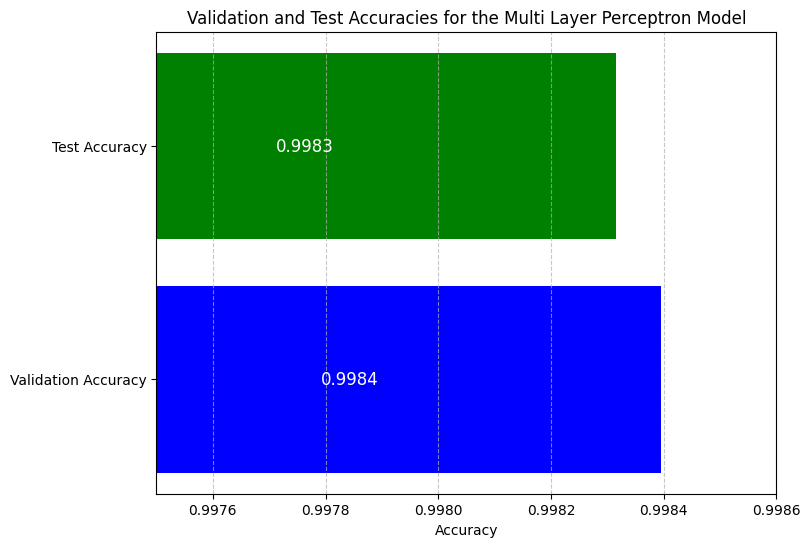

In [86]:
import matplotlib.pyplot as plt

# Define the accuracies and labels
accuracies = [0.9983949038196274, 0.9983146659176293]
labels = ['Validation Accuracy', 'Test Accuracy']

# Plot the horizontal bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(labels, accuracies, color=['blue', 'green'])

# Add accuracy values as labels on the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_width() - 0.0005, bar.get_y() + bar.get_height() / 2, '{:.4f}'.format(accuracy),
             va='center', ha='right', color='white', fontsize=12)

plt.title('Validation and Test Accuracies for the Multi Layer Perceptron Model')
plt.xlabel('Accuracy')
plt.xlim(0.9975, 0.9986)  # Set x-axis limit to focus on the high accuracy range
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

